# Método de la Razón Dorada (Golden Section Search)
## Búsqueda de mínimo local en intervalo cerrado

In [8]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Celda 2: Función objetivo  
f = lambda x: x**2 - 2*x + 1
# Función ejemplo: (x-1)². Mínimo en x = 1.

In [10]:
# Celda 3: Implementación del método de razón dorada
def metodo_razon_dorada(f, a, b, tol=1e-6, max_iter=100):
    phi = (1 + np.sqrt(5)) / 2  # Razón dorada
    resphi = 2 - phi
    iteraciones, x_vals, fx_vals, errores = [], [], [], []
    
    for i in range(max_iter):
        x1, x2 = a + resphi * (b - a), b - resphi * (b - a)
        if f(x1) < f(x2): b = x2
        else: a = x1
        x_n = (a + b) / 2
        error = abs(b - a)
        iteraciones.append(i + 1)
        x_vals.append(x_n)
        fx_vals.append(f(x_n))
        errores.append(error)
        if error < tol: break
    
    tabla = pd.DataFrame({'Iteración': iteraciones, 'x_n': x_vals, 'f(x_n)': fx_vals, 'Error_abs': errores})
    return x_n, tabla, x_vals

In [23]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_razon_dorada(f, 0, 4)

print("Óptimo encontrado:", x_opt)
print(tabla.round(6))

Óptimo encontrado: 0.9999998731157049
    Iteración       x_n    f(x_n)  Error_abs
0           1  1.236068  0.055728   2.472136
1           2  0.763932  0.055728   1.527864
2           3  1.055728  0.003106   0.944272
3           4  0.875388  0.015528   0.583592
4           5  0.986844  0.000173   0.360680
5           6  1.055728  0.003106   0.222912
6           7  1.013156  0.000173   0.137767
7           8  0.986844  0.000173   0.085145
8           9  1.003106  0.000010   0.052622
9          10  0.993056  0.000048   0.032522
10         11  0.999267  0.000001   0.020100
11         12  1.003106  0.000010   0.012422
12         13  1.000733  0.000001   0.007678
13         14  0.999267  0.000001   0.004745
14         15  1.000173  0.000000   0.002933
15         16  0.999613  0.000000   0.001812
16         17  0.999959  0.000000   0.001120
17         18  1.000173  0.000000   0.000692
18         19  1.000041  0.000000   0.000428
19         20  0.999959  0.000000   0.000264
20         21  1.

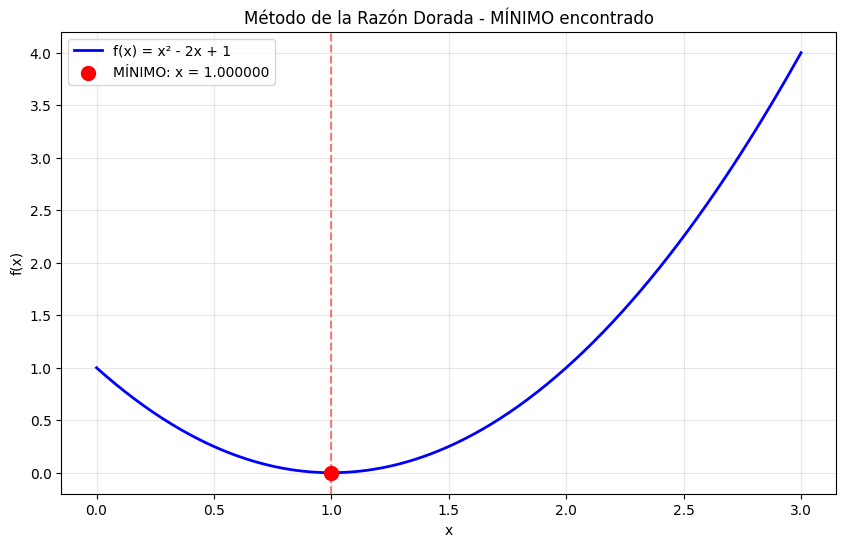

In [24]:
# Celda 5: Gráfica de la función y optimización
x = np.linspace(0, 3, 300)
y = f(x)

# Determinar si es mínimo o máximo analizando la segunda derivada
h = 1e-5
segunda_derivada = (f(x_opt + h) - 2*f(x_opt) + f(x_opt - h)) / (h**2)
es_minimo = segunda_derivada > 0
tipo_extremo = "MÍNIMO" if es_minimo else "MÁXIMO"

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x² - 2x + 1')
plt.scatter(x_opt, f(x_opt), color='red', s=100, zorder=5, label=f'{tipo_extremo}: x = {x_opt:.6f}')
plt.axvline(x=x_opt, color='red', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de la Razón Dorada - {tipo_extremo} encontrado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

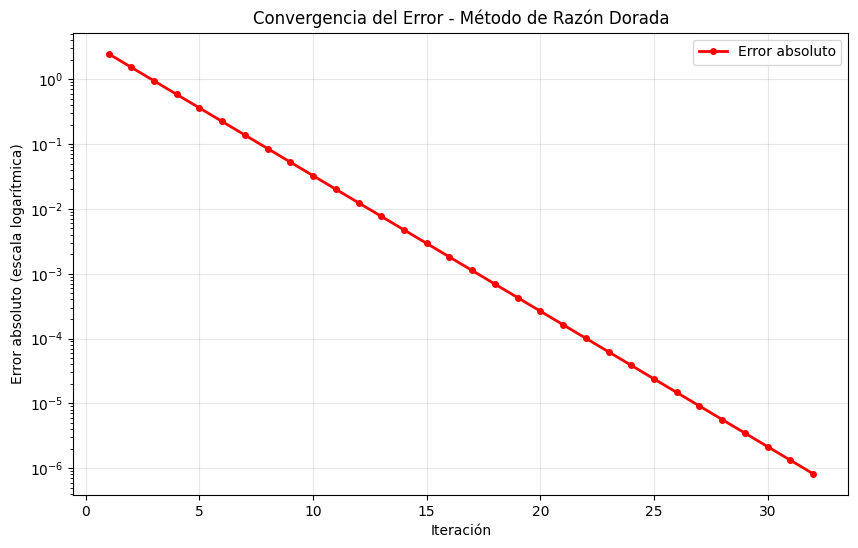

Error final: 8.21e-07
Tasa de convergencia promedio: -0.4812


In [13]:
# Celda 6: Gráfica de error de convergencia
plt.figure(figsize=(10, 6))
plt.semilogy(tabla['Iteración'], tabla['Error_abs'], 'r-o', linewidth=2, markersize=4, label='Error absoluto')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto (escala logarítmica)')
plt.title('Convergencia del Error - Método de Razón Dorada')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Error final: {tabla['Error_abs'].iloc[-1]:.2e}")
print(f"Tasa de convergencia promedio: {np.mean(np.diff(np.log(tabla['Error_abs']))):.4f}")

In [14]:
# Celda 7: Interfaz interactiva simple
print("=== Método de Razón Dorada Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Intervalo del usuario
interval_str = input("Ingrese [a,b] (ej. 0,4) o dejar vacío: ").strip()
a, b = 0, 4
if interval_str:
    try:
        vals = [float(x.strip()) for x in interval_str.split(',')]
        if len(vals) == 2:
            a, b = vals
    except:
        print("Intervalo inválido, usando [0,4]")

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_razon_dorada(f, a, b)
    print(f"\nÓptimo encontrado: x = {x_opt_user:.6f}")
    print(tabla_user.tail().round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Razón Dorada Interactivo ===
Usando función: 7*x**4 - 4*x**3

Óptimo encontrado: x = 1.000000
    Iteración       x_n    f(x_n)  Error_abs
26         27  1.000002  3.000036   0.000005
27         28  1.000001  3.000023   0.000003
28         29  1.000001  3.000014   0.000002
29         30  1.000001  3.000009   0.000001
30         31  1.000000  3.000005   0.000001
